### 0. Loading libraries

In [1]:
from keras.datasets import mnist
from keras.models import load_model
from keras.utils import to_categorical
from keras import models, layers, losses, metrics, optimizers
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report
from keras import backend as K
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import tensorflow as tf
from cv2 import *
if tf.test.gpu_device_name():
    print('Default GPU Device: {}'.format(tf.test.gpu_device_name()))
else:
    print("Please install GPU version of TF")

Using TensorFlow backend.


Default GPU Device: /device:GPU:0


### 0.1 Loading dataset

In [0]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

I tried to normalize data because when I tried all my models at the first place, I couldn't get result over 98%, so I tried it and after it every model got 99% on test data.

In [0]:
x_train = x_train.reshape(x_train.shape[0], 28, 28, 1)
y_train = to_categorical(y_train)
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train/=255
x_test/=255

In [0]:
features_train, features_val, labels_train, labels_val = train_test_split(x_train, 
                                                                          y_train, 
                                                                          test_size = 0.2, 
                                                                          random_state = 42, 
                                                                          stratify = np.argmax(y_train, axis=1))

### 1. Training the models

### 1.1 First attempt

I started with simle one hidden layer, one dense layer convolutional neural network to see what it does. It did not give me results that I was trying to reach - 99% on the test data. I increased amount of hidden layers, but I kept all of the layers relatively small with 'valid' option to train a network faster. After normalization it break through 98% on the test data. I run this model many times, the last run, I got pretty nice result with 99% on the test data, and moreover, accuracy on training and validation sets got really good.

In [5]:
model = models.Sequential()
model.add(layers.Conv2D(32, kernel_size=(3,3), padding='valid', input_shape=(28,28,1)))
model.add(layers.MaxPooling2D(pool_size=(2,2)))
model.add(layers.Conv2D(32, kernel_size=(3,3), padding='valid', input_shape=(28,28,1)))
model.add(layers.MaxPooling2D(pool_size=(2,2)))
model.add(layers.Flatten())
model.add(layers.Dense(60, activation='relu'))
model.add(layers.Dropout(0.2))
model.add(layers.Dense(10, activation='softmax'))

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


In [0]:
model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['acc'])

In [7]:
history = model.fit(features_train, 
                    labels_train, 
                    epochs=20, 
                    batch_size=512,
                    validation_data=(features_val, labels_val))

Instructions for updating:
Use tf.cast instead.
Train on 48000 samples, validate on 12000 samples
Epoch 1/20
48000/48000 [==============================] - 3s 63us/step - loss: 0.6045 - acc: 0.8202 - val_loss: 0.1994 - val_acc: 0.9406
Epoch 2/20
48000/48000 [==============================] - 1s 17us/step - loss: 0.1989 - acc: 0.9404 - val_loss: 0.1202 - val_acc: 0.9652
Epoch 3/20
48000/48000 [==============================] - 1s 17us/step - loss: 0.1336 - acc: 0.9597 - val_loss: 0.0917 - val_acc: 0.9731
Epoch 4/20
48000/48000 [==============================] - 1s 17us/step - loss: 0.1017 - acc: 0.9694 - val_loss: 0.0718 - val_acc: 0.9797
Epoch 5/20
48000/48000 [==============================] - 1s 17us/step - loss: 0.0837 - acc: 0.9743 - val_loss: 0.0663 - val_acc: 0.9810
Epoch 6/20
48000/48000 [==============================] - 1s 17us/step - loss: 0.0731 - acc: 0.9770 - val_loss: 0.0605 - val_acc: 0.9827
Epoch 7/20
48000/48000 [==============================] - 1s 17us/step - loss: 0

### 1.1.1 Plotting the result

#### Obtain history object for plotting

In [0]:
history_dict_1 = history.history
loss_1 = history_dict_1['loss']
val_loss_1 = history_dict_1['val_loss']
acc_1 = history_dict_1['acc']
val_acc_1 = history_dict_1['val_acc']

epochs_1 = range(1, len(acc_1)+1)

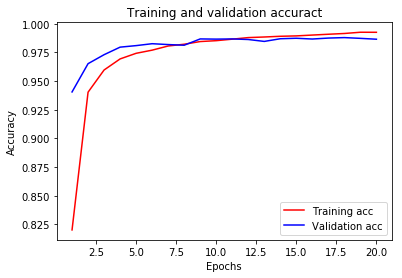

In [9]:
plt.plot(epochs_1, acc_1, 'r', label='Training acc')
plt.plot(epochs_1, val_acc_1, 'b', label='Validation acc')
plt.title('Training and validation accuract')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

On the graph we see that using dropout of 0.2 does not stop model from overfitting because training curve is still growing when validation curve is stagnating.

### 1.1.2 Numering the results

#### Confusion matrix and classification report

In [0]:
y_pred_1 = model.predict(x_test.reshape(x_test.shape[0],28,28,1))
y_pred_test_1 = np.argmax(y_pred_1, axis=1)

In [11]:
print(confusion_matrix(y_test, y_pred_test_1))
print(classification_report(y_test, y_pred_test_1))

[[ 974    0    1    0    0    1    2    1    1    0]
 [   0 1126    0    1    0    0    2    0    6    0]
 [   1    1 1014    2    2    1    0    4    6    1]
 [   0    0    1  999    0    5    0    0    4    1]
 [   0    0    0    0  976    0    0    0    1    5]
 [   2    0    1    5    0  877    2    1    3    1]
 [   5    1    1    0    1    3  945    0    2    0]
 [   0    1    5    3    0    0    0 1006    4    9]
 [   3    0    2    0    0    1    0    2  966    0]
 [   2    0    0    2    3    3    1    1    2  995]]
              precision    recall  f1-score   support

           0       0.99      0.99      0.99       980
           1       1.00      0.99      0.99      1135
           2       0.99      0.98      0.99      1032
           3       0.99      0.99      0.99      1010
           4       0.99      0.99      0.99       982
           5       0.98      0.98      0.98       892
           6       0.99      0.99      0.99       958
           7       0.99      0.98   

From confusion matrix we can see the biggest missclassification was of 9 beeing classified as 4.

From classificaiton report we can see that 1 and 4 got almost 100% classification unlike 9 getting 97% on recall because of 12 entries were missclassified.
___

In [12]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 11, 11, 32)        9248      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 5, 5, 32)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 800)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 60)                48060     
_________________________________________________________________
dropout_1 (Dropout)          (None, 60)                0         
__________

Only 58k parameters total that seems to be a nice result. It is clearly see how max pooling decreases matrix making it twice smaller. At the end it gets really small because we use 'valid' option for our convolutional layers.
___

#### Number of missclassified images

In [13]:
indecies_1 = np.where(y_pred_test_1 != y_test)
np.shape(indecies_1)

(1, 122)

About 10% of test data was missclassified.
___

### 1.2 Second attempt

My goal was in next attempts to decrease number of missclassified entries. I tried to increase amount of kernels a layer and add extra dense layer for better classification, also I used 'same' option to try keep more information about pictures. I changed kernel size to see if it improves learning proccess.

Results were: 99% on the test data and 132 missclassified. 

It performed worse than first attempt but only after normalization step that I added.

In [0]:
model = models.Sequential()
model.add(layers.Conv2D(64, kernel_size=(3,3), padding='same', input_shape=(28,28,1)))
model.add(layers.MaxPooling2D(pool_size=(2,2)))
model.add(layers.Conv2D(40, kernel_size=(5,5), padding='valid', input_shape=(28,28,1)))
model.add(layers.MaxPooling2D(pool_size=(3,3)))
model.add(layers.Flatten())
model.add(layers.Dense(59, activation='relu'))
model.add(layers.Dense(17, activation='relu'))
model.add(layers.Dropout(0.35))
model.add(layers.Dense(10, activation='softmax'))

### 1.3 Third attempt

Almost identical model, but with regular 3x3 kernel size just to compare what difference might be.

Results were: 99% on the test data 124 missclassified.

In [0]:
model = models.Sequential()
model.add(layers.Conv2D(64, kernel_size=(3,3), padding='same', input_shape=(28,28,1)))
model.add(layers.MaxPooling2D(pool_size=(2,2)))
model.add(layers.Conv2D(40, kernel_size=(3,3), padding='valid', input_shape=(28,28,1)))
model.add(layers.MaxPooling2D(pool_size=(2,2)))
model.add(layers.Flatten())
model.add(layers.Dense(59, activation='relu'))
model.add(layers.Dense(17, activation='relu'))
model.add(layers.Dropout(0.3))
model.add(layers.Dense(10, activation='softmax'))

### 1.4 Last attempt

After previous models I tried many different options to see if any will produce high score with minimum missclassification on the test data. I blew up my model with extra layer and extra epochs - 50 instead of 20. Also, I decreased batch size by a half for better learning. I run into a problem using 'valid' on all layers - after third maxpool I was getting an error because there was not enough size of the matrix to do pooling. So I changed all to 'same' that significantly decreased learning process.

Resuls of this model after many runs: 99% on test data almost 100% on traning and 99% on validation. Only 95 missclassified entries.

In [0]:
model = models.Sequential()
model.add(layers.Conv2D(64, kernel_size=(3,3), padding='same', input_shape=(28,28,1)))
model.add(layers.MaxPooling2D(pool_size=(3,3)))
model.add(layers.Conv2D(50, kernel_size=(5,5), padding='same', input_shape=(28,28,1)))
model.add(layers.MaxPooling2D(pool_size=(3,3)))
model.add(layers.Conv2D(50, kernel_size=(5,5), padding='same', input_shape=(28,28,1)))
model.add(layers.MaxPooling2D(pool_size=(3,3)))
model.add(layers.Flatten())
model.add(layers.Dense(67, activation='relu'))
model.add(layers.Dense(19, activation='relu'))
model.add(layers.Dropout(0.35))
model.add(layers.Dense(10, activation='softmax'))

In [0]:
model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['acc'])

In [18]:
history = model.fit(features_train, 
                    labels_train, 
                    epochs=50, 
                    batch_size=256,
                    validation_data=(features_val, labels_val))

Train on 48000 samples, validate on 12000 samples
Epoch 1/50
48000/48000 [==============================] - 3s 53us/step - loss: 1.0476 - acc: 0.6311 - val_loss: 0.2160 - val_acc: 0.9391
Epoch 2/50
48000/48000 [==============================] - 2s 42us/step - loss: 0.3287 - acc: 0.8941 - val_loss: 0.1267 - val_acc: 0.9639
Epoch 3/50
48000/48000 [==============================] - 2s 41us/step - loss: 0.2021 - acc: 0.9397 - val_loss: 0.0743 - val_acc: 0.9793
Epoch 4/50
48000/48000 [==============================] - 2s 41us/step - loss: 0.1525 - acc: 0.9530 - val_loss: 0.0744 - val_acc: 0.9813
Epoch 5/50
48000/48000 [==============================] - 2s 41us/step - loss: 0.1323 - acc: 0.9576 - val_loss: 0.0588 - val_acc: 0.9850
Epoch 6/50
48000/48000 [==============================] - 2s 40us/step - loss: 0.1071 - acc: 0.9654 - val_loss: 0.0612 - val_acc: 0.9860
Epoch 7/50
48000/48000 [==============================] - 2s 39us/step - loss: 0.0901 - acc: 0.9718 - val_loss: 0.0778 - val_acc

### 1.4.1 Plotting the result

#### Obtain history object for plotting

In [0]:
history_dict_1 = history.history
loss_1 = history_dict_1['loss']
val_loss_1 = history_dict_1['val_loss']
acc_1 = history_dict_1['acc']
val_acc_1 = history_dict_1['val_acc']

epochs_1 = range(1, len(acc_1)+1)

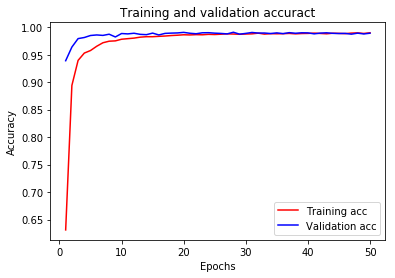

In [20]:
plt.plot(epochs_1, acc_1, 'r', label='Training acc')
plt.plot(epochs_1, val_acc_1, 'b', label='Validation acc')
plt.title('Training and validation accuract')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

It seems like there is almost no overfitting happening based on the graph, it's happening because of the we have 50 epochs that makes difference unnoticible. But accuracy number from the model  acc: 0.9924, val_acc: 0.9890 say that the gap is still feasible. Accuracy on the traning set is larger so overfitting still occurs during training, but it is a good result over 50 epochs. 

### 1.4.2 Numering the results

#### Confusion matrix and classification report

In [0]:
y_pred_1 = model.predict(x_test.reshape(x_test.shape[0],28,28,1))
y_pred_test_1 = np.argmax(y_pred_1, axis=1)

In [22]:
print(confusion_matrix(y_test, y_pred_test_1))
print(classification_report(y_test, y_pred_test_1))

[[ 975    0    2    0    0    0    2    1    0    0]
 [   0 1130    1    0    0    0    1    2    1    0]
 [   1    1 1022    0    2    0    0    6    0    0]
 [   0    0    1  999    0    2    0    3    0    5]
 [   0    0    1    0  971    0    0    2    0    8]
 [   0    1    0    4    0  886    0    0    0    1]
 [   4    2    0    0    1    1  949    0    1    0]
 [   0    1    2    0    0    0    0 1022    0    3]
 [   1    1    5    0    0    4    0    1  959    3]
 [   0    1    1    1    4    3    0    7    0  992]]
              precision    recall  f1-score   support

           0       0.99      0.99      0.99       980
           1       0.99      1.00      0.99      1135
           2       0.99      0.99      0.99      1032
           3       1.00      0.99      0.99      1010
           4       0.99      0.99      0.99       982
           5       0.99      0.99      0.99       892
           6       1.00      0.99      0.99       958
           7       0.98      0.99   

The results seem really nice, only 4 was confused with 9, but other numbers all around 5 missclassified total that seems for me pretty impresive.

In [23]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_7 (Conv2D)            (None, 28, 28, 64)        640       
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 9, 9, 64)          0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 9, 9, 50)          80050     
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 3, 3, 50)          0         
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 3, 3, 50)          62550     
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 1, 1, 50)          0         
_________________________________________________________________
flatten_4 (Flatten)          (None, 50)                0         
__________

We see with extra hidden layers our total number of parameters is got significantly larger - 3 times larger.

In [0]:
#model.save('model99_88(9896_9902).h5')

### 1.4.3 Showing missclassified entries

#### Finding missclasssified indecies

In [25]:
indecies = np.where(y_pred_test_1 != y_test)
np.shape(indecies)

(1, 95)

#### Extracting missclassified entries from test data

In [0]:
x_train_misses = np.array([x_test[i] for i in indecies[0]])

In [27]:
x_train_misses.shape

(95, 28, 28)

#### Extracting missclasified lables
- actual labels
- missclassified labels

In [0]:
y_mis_matrix = np.array([y_pred_test_1[i] for i in indecies])
y_act_matrix = np.array([y_test[i] for i in indecies])

I zipped them into tuples and used this way but then changed my mind and made it more clean to show labels for each image displayed. Left the code just because it was a part of the proccess.

In [0]:
zipped_matrix_1 = list(zip(y_act_matrix[0], y_mis_matrix[0]))

In [30]:
np.shape(zipped_matrix_1)

(95, 2)

#### Displaying missclassified entries
I simply display labels in the title of each image to clearly compare what it supposte to be and what the neural network chose. Some of the entries seem to be missclassified by the human who labeled all of them; some of them does not look like actual label at all, and the neural network classified it the same I would classify it which is really amazing.

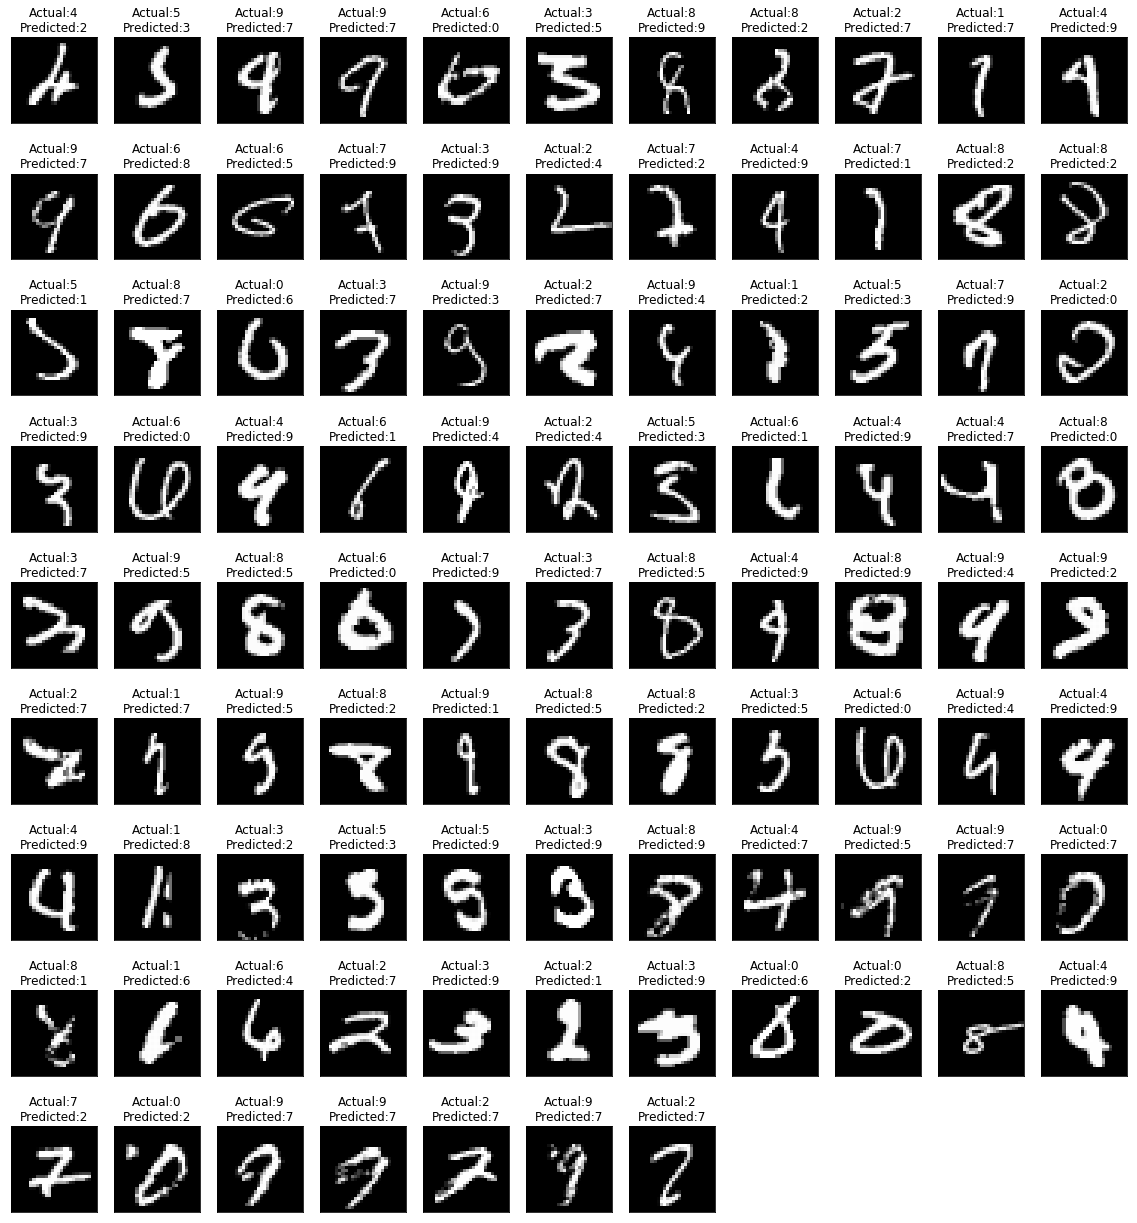

In [31]:
fig=plt.figure(figsize=(20, 20))
fig.subplots_adjust(top=2)
columns = 11
rows = 20
for i in range(0,len(x_train_misses)):
    fig.add_subplot(rows, columns, i+1)
    plt.title(('Actual:{}\nPredicted:{}'.format(y_act_matrix[0][i], y_mis_matrix[0][i])), size=12)
    plt.tick_params(which='both',bottom=False, left=False,labelbottom=False, labelleft=False)
    plt.imshow(x_train_misses[i], cmap = cm.gray)
    
plt.show()

### 2. Looking into the model layers.

#### See how many layers our model has

In [32]:
np.shape(model.layers)

(11,)

### 2.1 First layer of the network: convolutional layer


#### Making functions to look into first 4 layers

In [0]:
layer_0 = K.function([model.layers[0].input, K.learning_phase()], [model.layers[0].output])
layer_1 = K.function([model.layers[0].input, K.learning_phase()], [model.layers[1].output])
layer_2 = K.function([model.layers[0].input, K.learning_phase()], [model.layers[2].output])
layer_3 = K.function([model.layers[0].input, K.learning_phase()], [model.layers[3].output])

#### Apply all filters from the first layer
I run entire data set through the layers but chose apply all the filters on the first number in the set. We can see how different kernels affect the image making it more sharp and "highlighting" different edges of the 7. Also, there are some that look similar for a human's eyes.  Using kernels 3x3 with default strides (1,1) and with extra padding to be able to use more maxpooling layers in the network.

(10000, 28, 28, 64)


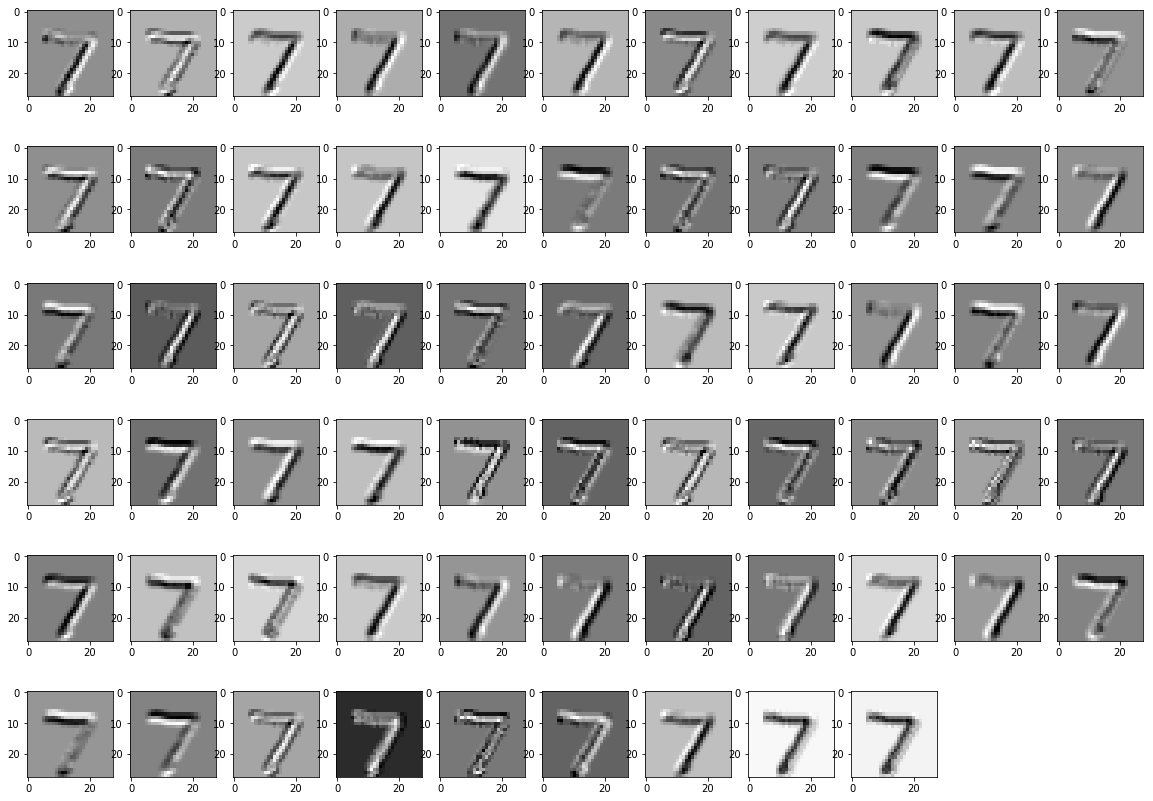

In [34]:
x = x_test.reshape(x_test.shape[0],28,28,1)
layer_output = layer_0([x, 0])[0]

print(layer_output.shape)
print(model.layers[0])

fig_kernel=plt.figure(figsize=(20, 20))
fig_kernel.subplots_adjust(top=2)
columns = 11
rows = 20
for i in range(0,64):
    fig_kernel.add_subplot(rows, columns, i+1)
    plt.imshow(layer_output[0][:,:,i], cmap = cm.gray)
    
plt.show()

### 2.2 Second layer of the network: maxpooling
Performing maxpooling on the previous layer, we see how much less information got to this layer. Maxpooling of 3x3 takes 1 highest weight from 9x9 part of the picture, so we see how more important features transfered from previous layer.

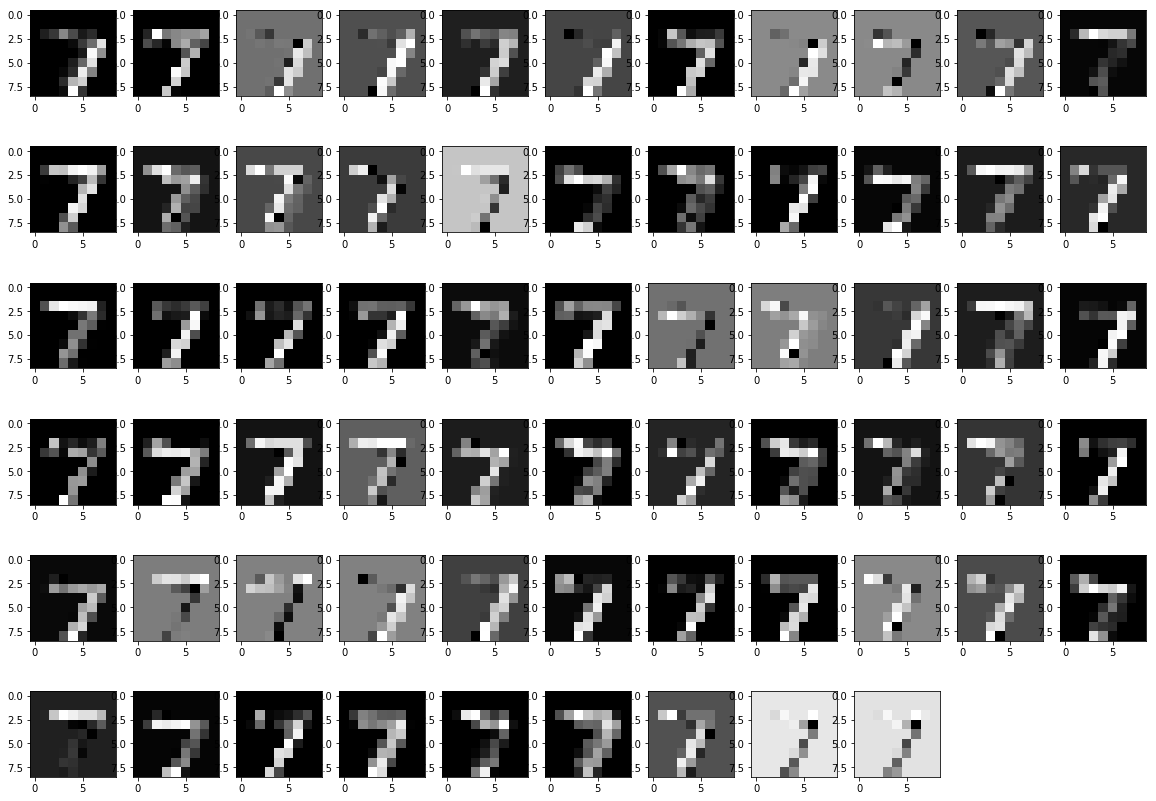

In [105]:
layer_output = layer_1([x, 0])[0]
#print(model.layers[1])
fig_kernel=plt.figure(figsize=(20, 20))
fig_kernel.subplots_adjust(top=2)
columns = 11
rows = 20
for i in range(0, 64):
    fig_kernel.add_subplot(rows, columns, i+1)
    plt.imshow(layer_output[0][:,:,i], cmap = cm.gray)
    
plt.show()

### 2.3 Third layer of the network: convolutional layer
Applying convolutions make it hard to read for me, but still some features are recognizable as somewhat number seven.

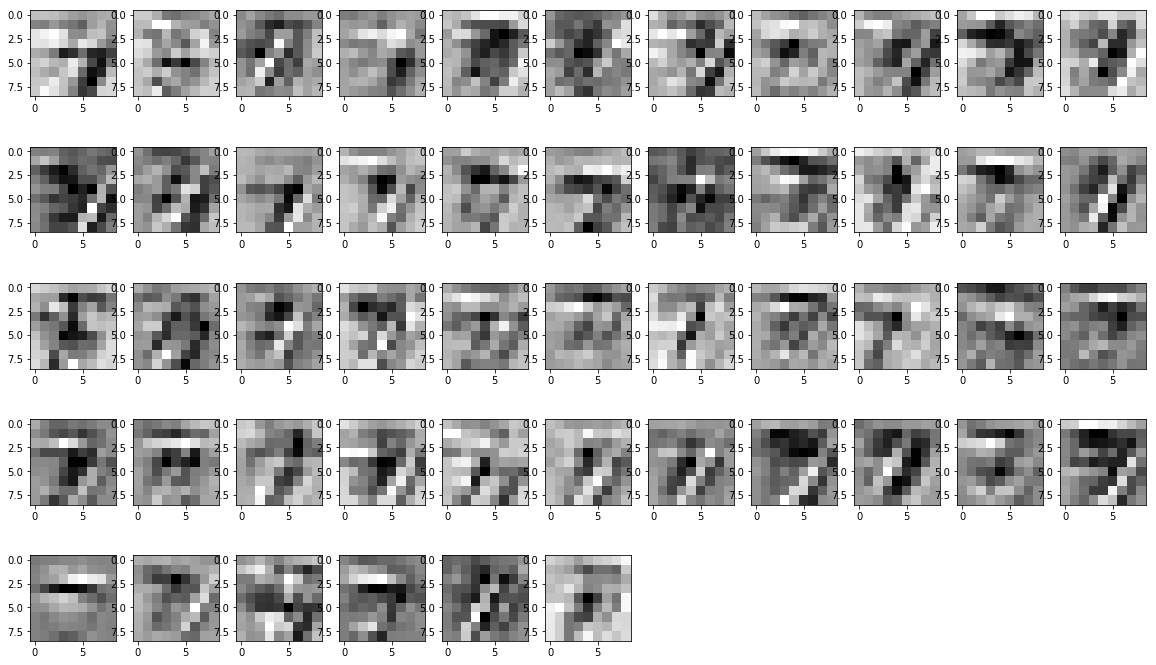

In [101]:
layer_output = layer_2([x, 0])[0]
print(model.layers[2])
fig_kernel=plt.figure(figsize=(20, 20))
fig_kernel.subplots_adjust(top=2)
columns = 11
rows = 20
for i in range(0,50):
    fig_kernel.add_subplot(rows, columns, i+1)
    plt.imshow(layer_output[0][:,:,i], cmap = cm.gray)
    
plt.show()

### 2.4 Fourth layer of the network: maxpooling

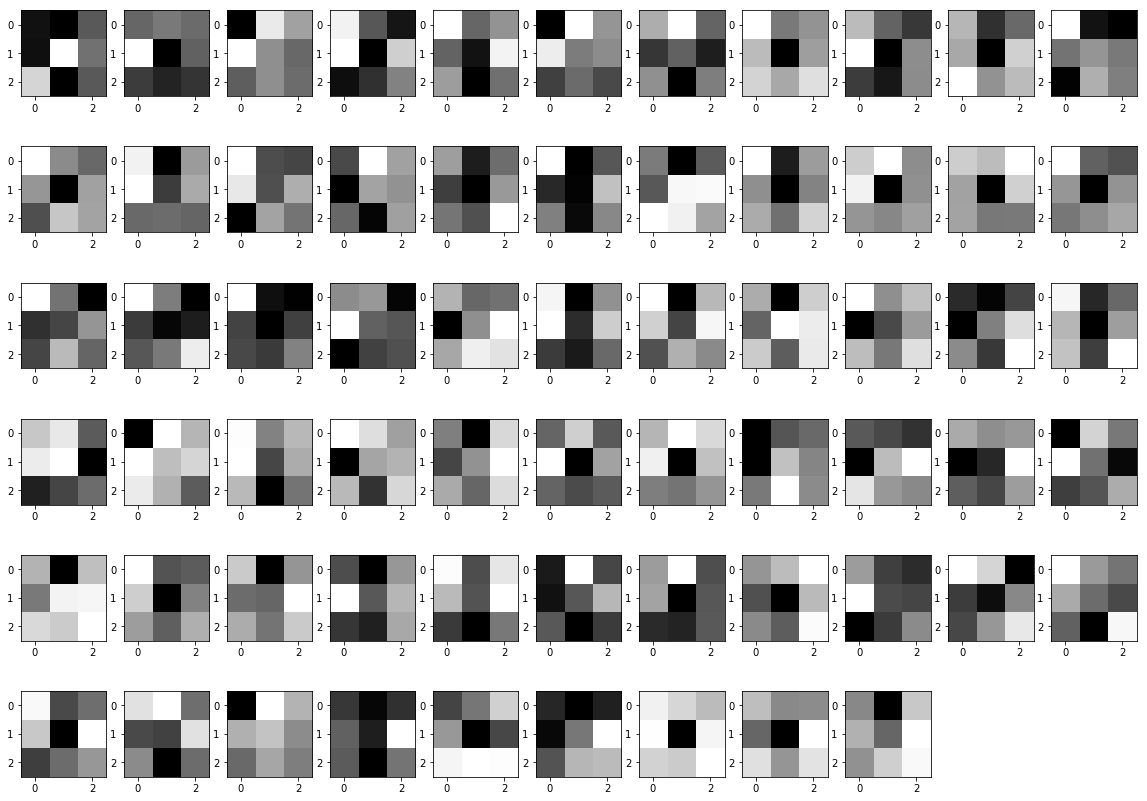

In [103]:
layer_output = layer_3([x, 0])[0]
print(model.layers[3])
fig_kernel=plt.figure(figsize=(20, 20))
fig_kernel.subplots_adjust(top=2)
columns = 11
rows = 20
for i in range(0, 64): 
    fig_kernel.add_subplot(rows, columns, i+1)
    plt.imshow(layer_output[i][:,:,2], cmap = cm.gray)
    
plt.show()

### 2.5 Model's kernels

### 2.5.1 Represented as a matrix for convolutional layer (3x3)
Slicing the weights of the first convolutional layer to see actual numbers for each filter

In [38]:
print(np.squeeze(model.layers[0].get_weights()[0]).shape)
for i in range(0,64):
  print('Kernel #', i+1, '\n',np.squeeze(model.layers[0].get_weights()[0][:,:,:,i]), '\n')

(3, 3, 64)
Kernel # 1 
 [[ 0.14159364  0.01482587 -0.2363633 ]
 [ 0.1498092  -0.030519   -0.06612436]
 [-0.11329078  0.03606797  0.06184234]] 

Kernel # 2 
 [[-2.5979251e-01 -9.2188798e-02  3.8285851e-02]
 [ 1.7590573e-01  1.6095604e-01  5.5821177e-02]
 [-6.9029978e-05 -8.5735247e-02 -1.4451958e-01]] 

Kernel # 3 
 [[ 0.27755255  0.0797303  -0.33846122]
 [ 0.06758234 -0.20561701 -0.2412294 ]
 [-0.4235634  -0.21648443  0.0290669 ]] 

Kernel # 4 
 [[ 0.067846    0.04987392 -0.28381985]
 [ 0.03834782  0.1167511  -0.19734299]
 [ 0.24935974 -0.16275927 -0.25884813]] 

Kernel # 5 
 [[ 0.07877143  0.13931808 -0.18698502]
 [ 0.01087186  0.07922336 -0.20829266]
 [ 0.0822676   0.13571015 -0.09073751]] 

Kernel # 6 
 [[ 0.19540548 -0.1306983  -0.11533104]
 [ 0.22305453 -0.14030784 -0.13687353]
 [ 0.01295046 -0.38304758 -0.00202994]] 

Kernel # 7 
 [[-0.09667359 -0.00835688 -0.01502133]
 [-0.01542364  0.23865417  0.07322251]
 [ 0.05701829 -0.08103444 -0.2029792 ]] 

Kernel # 8 
 [[ 0.291194   -0.0

### 2.5.2 Represented as a grayscale picture for convolutional layer (3x3)
Taking the weights and represent them as a grayscale matrix for each kernel.

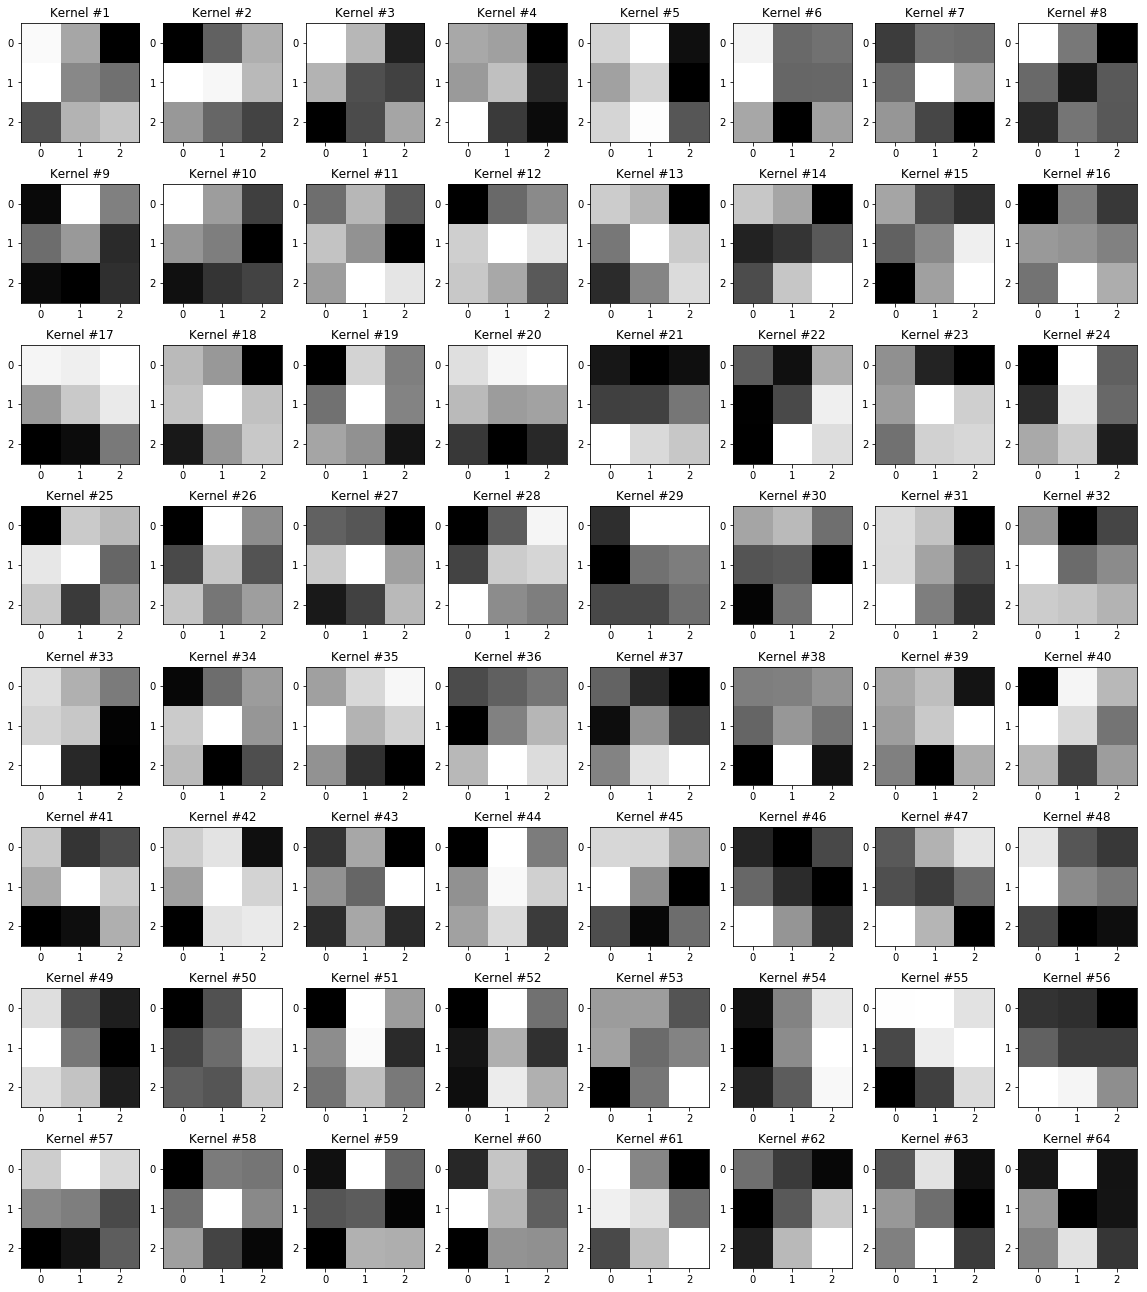

In [39]:
fig=plt.figure(figsize=(20, 20))
fig.subplots_adjust(top=1)
columns = 8
rows = 8
for i in range(0,64):
    fig.add_subplot(rows, columns, i+1)
    plt.title(('Kernel #{}'.format(i+1)), size=12)
    plt.imshow(np.squeeze(model.layers[0].get_weights()[0][:,:,:,i]), cmap = cm.gray)
    
plt.show()
 

### 2.5.3 Represented as a grayscale picture for convolutional layer (5x5)
Taking weights from different convolutional layer where kernels are 5x5 and represent them as a grayscale matrix for each kernel.

(5, 5, 64, 50)


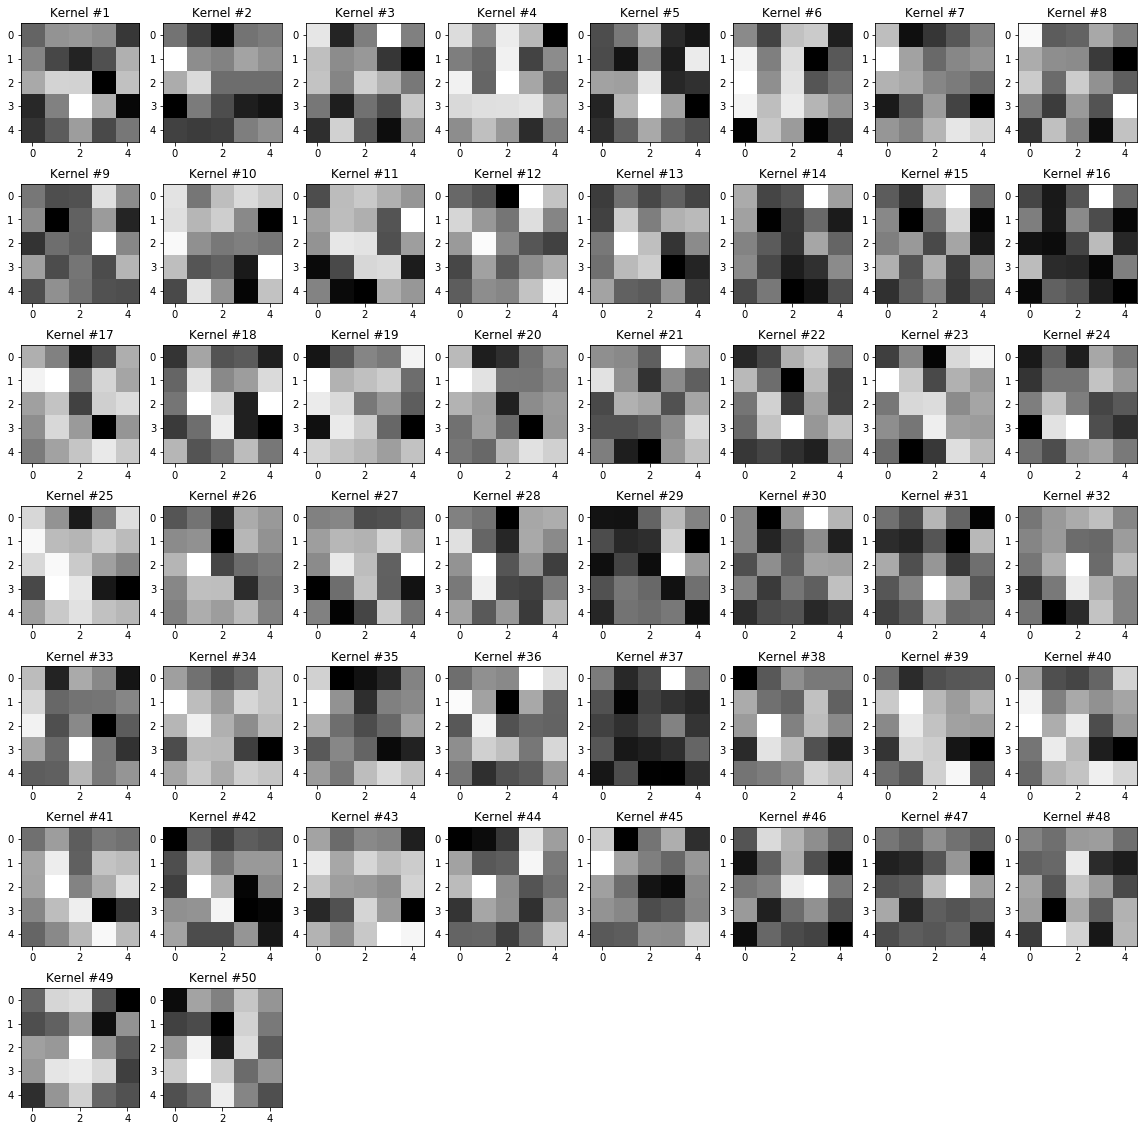

In [40]:
fig=plt.figure(figsize=(20, 20))
fig.subplots_adjust(top=1)
columns = 8
rows = 8
print(model.layers[2].get_weights()[0].shape)
for i in range(0,50):
    fig.add_subplot(rows, columns, i+1)
    plt.title(('Kernel #{}'.format(i+1)), size=12)
    plt.imshow(model.layers[2].get_weights()[0][:,:,i,1], cmap = cm.gray)
    
plt.show()
 

### 6. Using model to predict my handwritten numbers

### 6.1 Loading my images

In [0]:
image_1 = cv2.imread('one.jpg', cv2.IMREAD_GRAYSCALE)
image_2 = cv2.imread('two.jpg', cv2.IMREAD_GRAYSCALE)
image_3 = cv2.imread('three.jpg', cv2.IMREAD_GRAYSCALE)
image_4 = cv2.imread('four_1.jpg', cv2.IMREAD_GRAYSCALE)
image_5 = cv2.imread('five.jpg', cv2.IMREAD_GRAYSCALE)
image_6 = cv2.imread('six.jpg', cv2.IMREAD_GRAYSCALE)
image_7 = cv2.imread('seven.jpg', cv2.IMREAD_GRAYSCALE)
image_7 = cv2.resize(image_7, (28,28))
image_8 = cv2.imread('eight.jpg', cv2.IMREAD_GRAYSCALE)
image_9 = cv2.imread('nine_0 (1).jpg', cv2.IMREAD_GRAYSCALE)
image_0 = cv2.imread('zero_0 (1).jpg', cv2.IMREAD_GRAYSCALE)

#### Make an array to predict all at ones

In [0]:
images_np = np.array([image_0, image_1, image_2, image_3, image_4, image_5, image_6, image_7, image_8, image_9])

In [90]:
images_np.shape

(10, 28, 28)

#### Inverse images to black backrgound and white numbers
Because our model was trained on such features we need to prepare our data for model to predict appropriately 

In [91]:
images_np = np.array([255-image for image in images_np])
images_np.shape

(10, 28, 28)

#### Display inversed images
I tried make them different thikness and not common shape to see what convolutional neural network can recognize

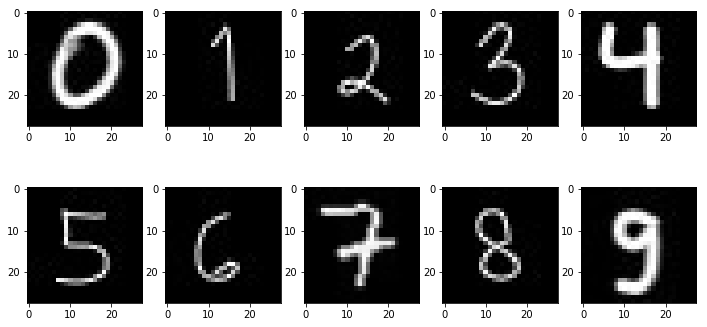

In [92]:
fig=plt.figure(figsize=(12, 12))
fig.subplots_adjust(top=0.5)
columns = 5
rows = 2
for i in range(0,len(images_np)):
    fig.add_subplot(rows, columns, i+1)
    #plt.title(('Kernel #{}'.format(i+1)), size=12)
    plt.imshow(images_np[i], cmap = cm.gray)
    
plt.show()

### 6.2 Predicting numbers
Reshaping data to input into neural network

In [0]:
y_pred_7 = model.predict(images_np.reshape(10,28,28,1))
y_pred_test_7 = np.argmax(y_pred_7, axis=1)

#### Print prediction made by the model
I tried different sets of numbers, and it seems like almost for all model itterations I did 4 is the hardest one to recognize. It is always confused with 9 in my case. I rerun model but on my own numbers 4 is never recognized correctly. Sometimes when model after training doesn't train well I can get more confused numbers like 4 and 9 as 7.

In [95]:
print(y_pred_test_7)

[0 1 2 3 9 5 6 7 8 9]


### 7. Questions

#### How many hidden layers are in your network?

_8 layers -- 3 convolutional layers 3 maxpool layers 2 dense layers._
####  How many convolutions are calculated in each convolution layer?

_64 , 50, 50 accordingly_
#### Run a single test example through the model and print some of the convolved images from the first layer. Can you see any features from the image that are revealed by printing?

_all highlighed parts which is represented by white color on the images. For number seven they are horizontal lines and diagonal lines._ (it seems all data represented as images has white as a higher weight)
#### Print couple of the convolution kernels as matrices (no need to print images). What kind of patterns can you see in the convolution kernels? 

_3x3 kernels from the first layer have straight and diagonal lines, also I noticed not a full line but a couple not connected by the picture dots making diagonal pattern without having contigous line._